# Ensemble methods for trees on the diabetes dataset

- In this notebook (diabetes_trees_ensembles.ipynb - on Blackboard) we will explore standard ways in which to combine (ensemble) multiple trees to create a single classifier, or regressor. One such method, Gradient Boosting (as made popular in the python library xgboost, and on many Kaggle competitions), has done very well in competitive ML, both due to good accuracy and computational efficiency.


- Execute the cells in the notebook, until you reach the part "Further Experiment". In this part we will work with a new dataset (California housing), which is quite big in terms of number of examples (20k+). Experiment with the different tree ensemble methods, playing with the different parameters (of which there are many!), share your code and your results, and let's see how low we can go in the validation error combining efforts from the entire class. When you execute the different classifiers, also keep a note of how long it takes them to train, aside from reporting the regression errors.


- Important note: In order to truly run a competition, I would have to hold out a final test set, and use it to compare the models that you output as candidate winners. This problem becomes more severe if you plan to run thousands and millions of trainings and evaluations using loops: At some point, you will get the best regressor on the validation set by chance (because of noise in the validation error), and there is no way for us to know if it is really the best. Hence, please limit your attempts to at most 100 trained models. (No cheating!)



In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

diabetes_dataset = load_diabetes(as_frame = True)
X = diabetes_dataset["data"]
y = diabetes_dataset["target"]


In [3]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [4]:
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

Create a binary (0/1) version of the labels.

In [5]:
cutoff = y.median()

In [6]:
# Split dataset into training set and test set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1)

# create a binary version of y for classification
y_bin_train = (y_train < cutoff).astype(int)
y_bin_val = (y_val < cutoff).astype(int)

# Bagging classifier - Taking the average of multiple trees

In [7]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
clf = BaggingClassifier(
    n_estimators = 10, # how many trees?
    max_samples = 0.75, # each tree will be built from a random subsample of 75% of the training data
    max_features = 0.5, # Each tree will be built from a random sample of 50% of the features,
)

In [ ]:
model = clf.fit(X_train, y_bin_train)

In [ ]:
print("Train Accuracy:",metrics.accuracy_score(y_bin_train, model.predict(X_train)))

print("Test Accuracy:",metrics.accuracy_score(y_bin_val, model.predict(X_val)))


In [ ]:
# we can actually see the array of trees that were created
model.estimators_

In [1]:
# let's look at the first
from sklearn.tree import plot_tree, DecisionTreeClassifier

plot_tree(model.estimators_[0])

NameError: name 'model' is not defined

In [ ]:
#help(BaggingClassifier)

In [ ]:
# Seems like the base tree is quite deep and complex, resulting in overfitting.
# It is possible to control the individual trees created by the bagging.
# For example, we can set the max_depth of the different trees as follows:

clf = BaggingClassifier(
    base_estimator = DecisionTreeClassifier(max_depth=2),
    n_estimators = 10, # how many trees?
    max_samples = 0.75, # each tree will be built from a random subsample of 75% of the training data
    max_features = 0.5, # Each tree will be built from a random sample of 50% of the features,
)
model = clf.fit(X_train, y_bin_train)

plot_tree(model.estimators_[0])

If we want to view the names of the features in the plot, then we need to be careful.  Remember that each estimator in the bag chooses a subset of features (in our case, we chose only 50%).  So first we would need to figure out which features were used for each classifier in the bag.

In [ ]:
for i in range(10):
  print (f"Estimator {i} used features {model.estimators_features_[i]}")

In [ ]:
#all features used in the model

print(f"Model used features {model.feature_names_in_} when fitted.")


Let's do the plotting again, this time displaying the feature names, after we extract them from the original dataset columns

In [ ]:
plot_tree(
    model.estimators_[0],
    feature_names = [X_train.columns[j] for j in model.estimators_features_[0]])

In [ ]:
print("Train Accuracy:",metrics.accuracy_score(y_bin_train, model.predict(X_train)))
print("Test Accuracy:",metrics.accuracy_score(y_bin_val, model.predict(X_val)))

Let's look at another estimator (number 1 in the array)

In [ ]:
plot_tree(
    model.estimators_[1],
    feature_names = [X_train.columns[j] for j in model.estimators_features_[1]])

# Bagging regression trees

In [8]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
clf = BaggingRegressor(
    base_estimator = DecisionTreeRegressor(max_depth=2),
    n_estimators = 10, # how many trees?
    max_samples = 0.75, # each tree will be built from a random subsample of 75% of the training data
    max_features = 0.5, # Each tree will be built from a random sample of 50% of the features,
)

In [ ]:
model = clf.fit(X_train, y_train)
model.estimators_

Let's look at the first two trees.

In [ ]:
# Same as before, we would need to use the estimators_features_ property
# of the model in order to map the original feature names to the features
# that were chosen for estimator 0.
plot_tree(
    model.estimators_[0],
    feature_names = [X_train.columns[j] for j in model.estimators_features_[0]])

In [ ]:
plot_tree(
    model.estimators_[1],
    feature_names = [X_train.columns[j] for j in model.estimators_features_[1]])

In [ ]:
print("Train Accuracy:",metrics.mean_squared_error(y_train, model.predict(X_train)))
print("Test Accuracy:",metrics.mean_squared_error(y_val, model.predict(X_val)))


In [ ]:
# Let's visualize the actual label versus the prediction
plt.plot(y_val, model.predict(X_val), '.b') # validation in blue

plt.plot(y_train, model.predict(X_train), '.r') # training in red

In [ ]:
# Let's try again, with slightly deeper trees, and more regressors in the bag.
clf = BaggingRegressor(
    base_estimator = DecisionTreeRegressor(max_depth=3),
    n_estimators = 15, # how many trees?
    max_samples = 0.75, # each tree will be built from a random subsample of 75% of the training data
    max_features = 0.5, # Each tree will be built from a random sample of 50% of the features,
)

model = clf.fit(X_train, y_train)

print("Test Accuracy:",metrics.mean_squared_error(y_val, model.predict(X_val)))
print("Train Accuracy:",metrics.mean_squared_error(y_train, model.predict(X_train)))

# Let's visualize the actual label versus the prediction
plt.plot(y_val, model.predict(X_val), '.b') # validation in blue
plt.plot(y_train, model.predict(X_train), '.r') # training in red

In [ ]:
# Let's verify that the resulting model is an average over the individual models
print (model.predict(X_val)[:5]) # Print the first 5 predictions only

In [ ]:
bag_of_predictions = []
for i in range(model.n_estimators):
  mapped_dataset = X_val.iloc[:, model.estimators_features_[i]]
  bag_of_predictions.append(model.estimators_[i].predict(mapped_dataset)[:5])

# This should be identical to the last cell (ignore the warnings)
print (np.mean(bag_of_predictions, axis=0)) # average over the predictors

# XGBoost is a tree based ensemble learning algorithm.  Let's try it. #

In [9]:
from xgboost import XGBRegressor # Or XGBClassifier, for classification

In [11]:
# The XGBRegressor has quite a few parameters, see documentation
# https://xgboost.readthedocs.io/en/stable/python/python_intro.html
# For now we just use a few
clf = XGBRegressor(
    n_estimators = 20,
    max_depth=3,
    subsample=0.9
)
model = clf.fit(X_train, y_train)

Test Accuracy: 3536.2707582920802
Train Accuracy: 1207.2799236840224


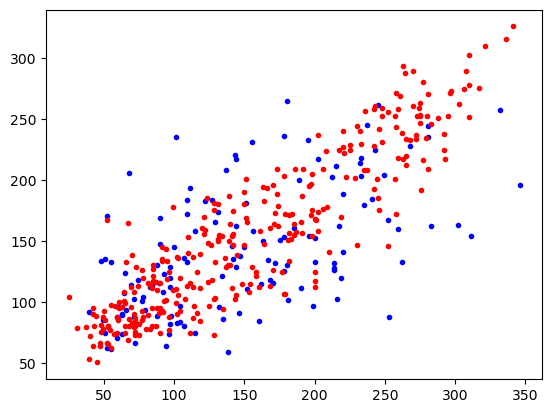

In [12]:
print("Test Accuracy:",metrics.mean_squared_error(y_val, model.predict(X_val)))
print("Train Accuracy:",metrics.mean_squared_error(y_train, model.predict(X_train)))

# Let's visualize the actual label versus the prediction
plt.plot(y_val, model.predict(X_val), '.b') # validation in blue
plt.plot(y_train, model.predict(X_train), '.r') # training in red

# Further experimentation

We shall download the california housing dataset (20k+ rows, 8 features).  The goal is to get the best validation error, using a tree based method.

Please run the train_test_split with the "random state = 1" option, so that you all get the exact same training and validation set, and you will be able to reproduce each other's findings.

Share your code, share your results, and let's see how low (of an error) you can go.  The rumor is that XGBoost is the best tree based ensemble method.  Let's find out for ourselves.

In [13]:
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

#sklearn.datasets.fetch_california_housing
from sklearn.datasets import fetch_california_housing

In [14]:
housing = fetch_california_housing(as_frame=True)

In [15]:
print (housing["DESCR"])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [16]:
X = housing['data']

In [17]:
y = housing['target']

In [18]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [19]:
y.describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# CHOOSE YOUR REGRESSOR
# DO you want XGBoost?
xgb_model = XGBRegressor(
    n_estimators = 20,
    max_depth=3,
    subsample=0.9,
    # TRY OUT OTHER PARAMETERS FROM THE DOCUMENTATION
)

xgb_model_fitted = xgb_model.fit(X_train,y_train)

# DO you want bagging?
bagging_reg_model = BaggingRegressor(
    estimator = DecisionTreeRegressor(max_depth=10),
    n_estimators = 60, # how many trees?
    max_samples = 0.9, # each tree will be built from a random subsample of 90% of the training data
    # TRY OUT OTHER PARAMETERS
)

bagging_reg_model_fitted = bagging_reg_model.fit(X_train, y_train)

In [ ]:
print('XGB Regressor model')
print("Test Error:",metrics.mean_squared_error(y_val, xgb_model_fitted.predict(X_val)))
print("Train Error:",metrics.mean_squared_error(y_train, xgb_model_fitted.predict(X_train)),'\n')

print('Bagging Regressor Model')
print("Test Error:",metrics.mean_squared_error(y_val, bagging_reg_model_fitted.predict(X_val)))
print("Train Error:",metrics.mean_squared_error(y_train, bagging_reg_model_fitted.predict(X_train)))


In [ ]:
# Note that if you get error above the variance of the target variable,
# then you are doing something terribly wrong!  So whatever you do, make sure you
# are below this number:
y.var()

# Exploratoy Data Analysis

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#sns.pairplot(X)

<Axes: xlabel='MedHouseVal', ylabel='Count'>

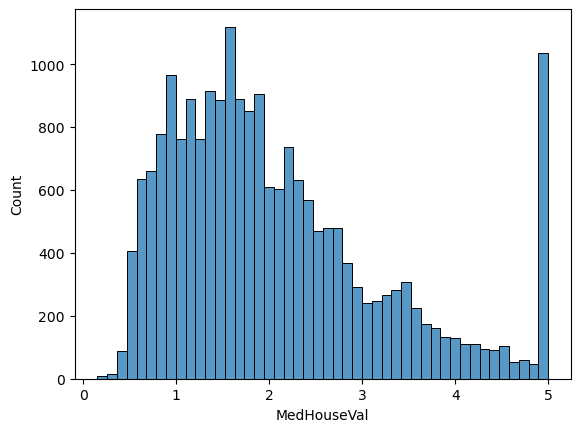

In [24]:
sns.histplot(y)

# Testing different models

In [25]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [ ]:
#instantiating a Standard Scaler
#scl = StandardScaler()
#scl.fit_transform(X)

#instantiating a Robust Scaler
#rcl = RobustScaler()
#rcl.fit_transform(X)


#splitting the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1)

#fitting the defined XGB Regressor model
xgb_model.fit(X_train, y_train)
print('XGB Regressor model')
print("Test Error:",metrics.mean_squared_error(y_val, xgb_model.predict(X_val)))
print("Train Error:",metrics.mean_squared_error(y_train, xgb_model.predict(X_train)),'\n')

#fitting the defined XGB Regressor model
bagging_reg_model.fit(X_train, y_train)
print('Bagging Regressor Model')
print("Test Error:",metrics.mean_squared_error(y_val, bagging_reg_model.predict(X_val)))
print("Train Error:",metrics.mean_squared_error(y_train, bagging_reg_model.predict(X_train)))


- **Above scaling didn't improve the MSE error.**

In [26]:
help(XGBRegressor)

Help on class XGBRegressor in module xgboost.sklearn:

class XGBRegressor(XGBModel, sklearn.base.RegressorMixin)
 |  XGBRegressor(*, objective: Union[str, Callable[[numpy.ndarray, numpy.ndarray], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'reg:squarederror', **kwargs: Any) -> None
 |  
 |  Implementation of the scikit-learn API for XGBoost regression.
 |  
 |  
 |  Parameters
 |  ----------
 |  
 |      n_estimators : int
 |          Number of gradient boosted trees.  Equivalent to number of boosting
 |          rounds.
 |  
 |      max_depth :  Optional[int]
 |          Maximum tree depth for base learners.
 |      max_leaves :
 |          Maximum number of leaves; 0 indicates no limit.
 |      max_bin :
 |          If using histogram-based algorithm, maximum number of bins per feature
 |      grow_policy :
 |          Tree growing policy. 0: favor splitting at nodes closest to the node, i.e. grow
 |          depth-wise. 1: favor splitting at nodes with highest loss change.
 | 

In [36]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define the hyperparameters you want to tune and their possible values
param_grid = {
    'n_estimators': [20, 50, 75],
    'max_depth': [3, 4, 5],
    'tree_method': ['auto', 'exact','approx', 'hist']
    }

# Create an instance of the XGBRegressor
xgb_model = XGBRegressor()

# Create a GridSearchCV object
grid_search = GridSearchCV(xgb_model, 
                           param_grid, 
                           scoring='neg_mean_squared_error', 
                           cv=3,
                          refit=True,
                          n_jobs=-1,
                          return_train_score=True)

# Fit the GridSearchCV object
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5], 'n_estimators': [20, 50, 75],
                         'tree_method': ['auto', 'exact', 'approx', 'hist']},
             return_train_score=True, scoring='neg_mean_squared_error')

In [37]:
# Get the best parameters 
best_params = grid_search.best_params_
print("Best Parameters:", best_params, '\n')


Best Parameters: {'max_depth': 5, 'n_estimators': 75, 'tree_method': 'approx'} 



In [46]:
#getting the results of the GridSearchCV
results = grid_search.cv_results_

results = pd.DataFrame(results)
results.sort_values('mean_test_score', ascending=False).T

,35,34,33,32,23,22,29,28,31,30,...,4,5,14,15,12,13,3,2,1,0
mean_fit_time,0.309847,0.415993,1.626906,1.744407,0.156145,0.199711,1.132135,1.093205,0.209679,0.304832,...,0.674195,0.686974,0.072819,0.067456,0.34188,0.28975,0.051795,0.056267,0.212671,0.216274
std_fit_time,0.013521,0.049023,0.091649,0.085469,0.006602,0.001848,0.036922,0.019278,0.004262,0.00216,...,0.005697,0.006073,0.000561,0.002779,0.0325,0.002397,0.002573,0.000647,0.004888,0.002569
mean_score_time,0.013106,0.013739,0.009712,0.019853,0.015651,0.010602,0.012984,0.0154,0.010092,0.010625,...,0.007633,0.014301,0.005387,0.005352,0.005529,0.005547,0.007235,0.008587,0.006407,0.005201
std_score_time,0.001928,0.001627,0.003585,0.005168,0.005362,0.000059,0.001747,0.004085,0.000611,0.001075,...,0.000518,0.010627,0.000109,0.000251,0.000306,0.000061,0.003706,0.004662,0.000876,0.000267
param_max_depth,5,5,5,5,4,4,5,5,5,5,...,3,3,4,4,4,4,3,3,3,3
param_n_estimators,75,75,75,75,75,75,50,50,50,50,...,50,50,20,20,20,20,20,20,20,20
param_tree_method,hist,approx,exact,auto,hist,approx,exact,auto,hist,approx,...,auto,exact,approx,hist,auto,exact,hist,approx,exact,auto
params,"{'max_depth': 5, 'n_estimators': 75, 'tree_met...","{'max_depth': 5, 'n_estimators': 75, 'tree_met...","{'max_depth': 5, 'n_estimators': 75, 'tree_met...","{'max_depth': 5, 'n_estimators': 75, 'tree_met...","{'max_depth': 4, 'n_estimators': 75, 'tree_met...","{'max_depth': 4, 'n_estimators': 75, 'tree_met...","{'max_depth': 5, 'n_estimators': 50, 'tree_met...","{'max_depth': 5, 'n_estimators': 50, 'tree_met...","{'max_depth': 5, 'n_estimators': 50, 'tree_met...","{'max_depth': 5, 'n_estimators': 50, 'tree_met...",...,"{'max_depth': 3, 'n_estimators': 50, 'tree_met...","{'max_depth': 3, 'n_estimators': 50, 'tree_met...","{'max_depth': 4, 'n_estimators': 20, 'tree_met...","{'max_depth': 4, 'n_estimators': 20, 'tree_met...","{'max_depth': 4, 'n_estimators': 20, 'tree_met...","{'max_depth': 4, 'n_estimators': 20, 'tree_met...","{'max_depth': 3, 'n_estimators': 20, 'tree_met...","{'max_depth': 3, 'n_estimators': 20, 'tree_met...","{'max_depth': 3, 'n_estimators': 20, 'tree_met...","{'max_depth': 3, 'n_estimators': 20, 'tree_met..."
split0_test_score,-0.231122,-0.231122,-0.231596,-0.231596,-0.239055,-0.239055,-0.236343,-0.236343,-0.237129,-0.237129,...,-0.275658,-0.275658,-0.278779,-0.278779,-0.27506,-0.27506,-0.312643,-0.312643,-0.315097,-0.315097
split1_test_score,-0.230669,-0.230669,-0.229407,-0.229407,-0.235349,-0.235349,-0.234596,-0.234596,-0.237818,-0.237818,...,-0.25934,-0.25934,-0.281684,-0.281684,-0.286105,-0.286105,-0.303045,-0.303045,-0.30644,-0.30644


In [42]:
print("TEST Error:",metrics.mean_squared_error(y_val, grid_search.predict(X_val)),'\n')


TEST Error: 0.2276223482607387 

